In [1]:
%%time

!pip install openai-whisper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.5/800.5 kB 15.3 MB/s eta 0:00:0000:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.4/209.4 MB 7.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 45.2 MB/s eta 0:00:00
  Created wheel for openai-whisper: filename=openai_whisper-20240930-py3-none-any.whl size=803321 sha256=9d9f11ab1d61f59e40505c4fed0922ab0a4f1cacfbf9dfff9ca9f24980d1b988
  Stored in directory: /root/.cache/pip/wheels/dd/4a/1f/d1c4bf3b9133c8168fe617ed979cab7b14fe381d059ffb9d83
Successfully built openai-whisper
CPU times: user 434 ms, sys: 103 ms, total: 537 ms
Wall time: 32.9 s


In [2]:
%%time

!pip install openai-whisper googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.8 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17395 sha256=d55228e58d8b7943497b22e6ee39d423a6380bf55a8e3cb3fb4d9e848304f49d
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:
      Succ

In [3]:
%%time

import warnings
warnings.filterwarnings('ignore')

CPU times: user 38 µs, sys: 10 µs, total: 48 µs
Wall time: 51 µs


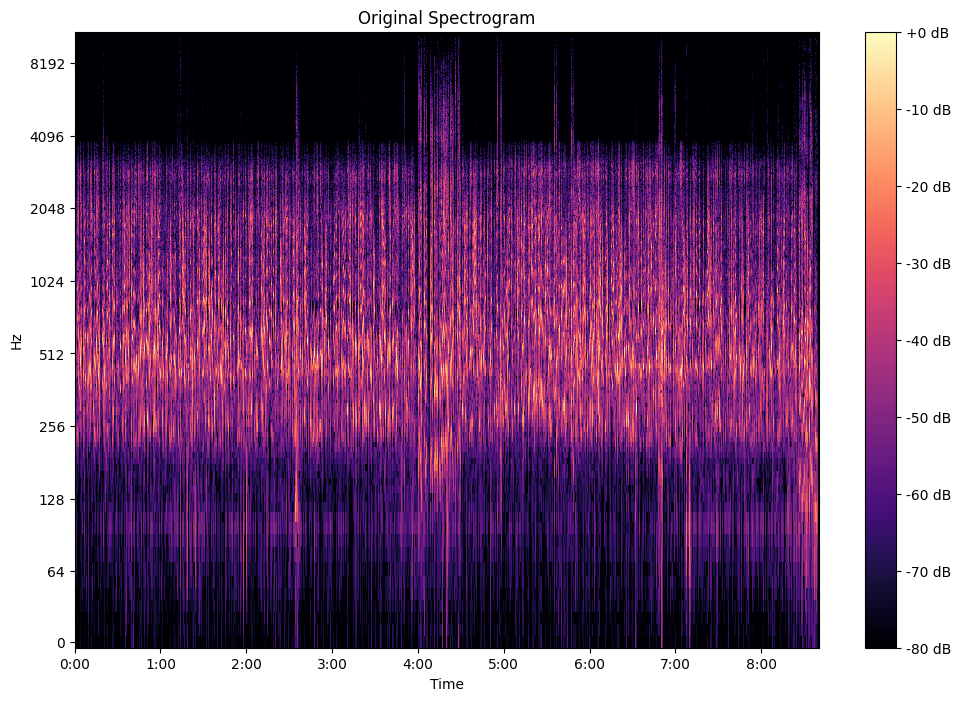

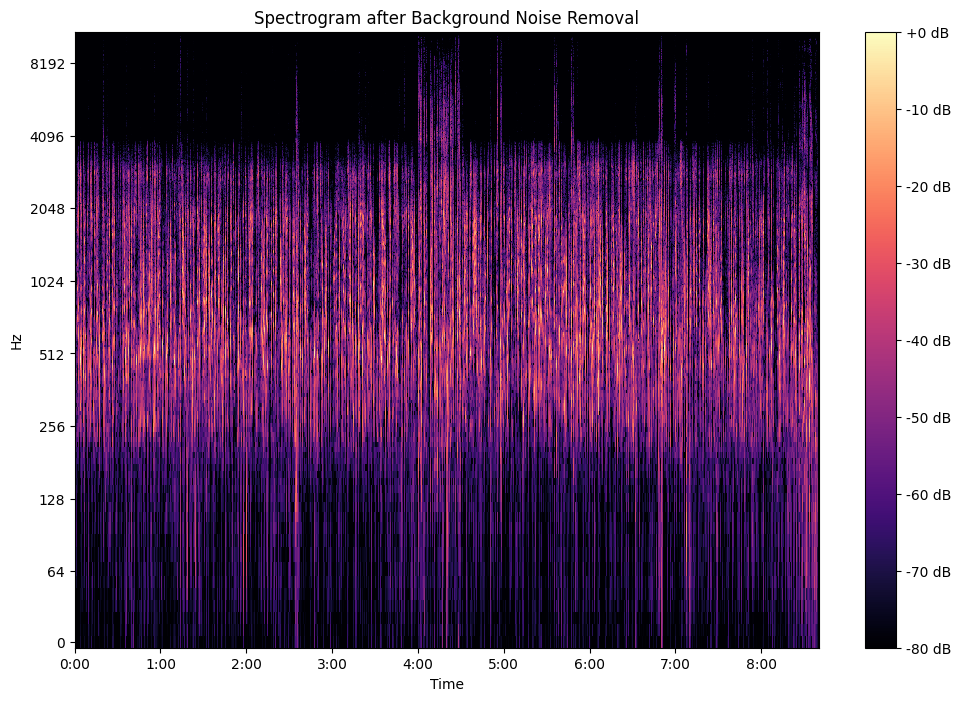

CPU times: user 1min 8s, sys: 5.71 s, total: 1min 14s
Wall time: 1min 18s


In [4]:
%%time

import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
import os

# Load the audio file
audio_file_path = "/kaggle/input/arabic-natural-audio-dataset/V7.wav"

# Replace with the path to your audio file
y, sr = librosa.load(audio_file_path)

# Display the original spectrogram
D_original = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(12, 8))
librosa.display.specshow(D_original, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Original Spectrogram')
plt.show()

# Apply background noise removal
y_harmonic, y_percussive = librosa.effects.hpss(y)
y_noise_removed = y - y_harmonic

# Display the spectrogram after background noise removal
D_noise_removed = librosa.amplitude_to_db(np.abs(librosa.stft(y_noise_removed)), ref=np.max)
plt.figure(figsize=(12, 8))
librosa.display.specshow(D_noise_removed, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram after Background Noise Removal')
plt.show()

In [5]:
%%time

import whisper

# Load the Whisper model
model = whisper.load_model('base')

# Load and transcribe the audio file
audio_file = y_noise_removed
text = model.transcribe(audio_file)

# Print the transcribed text
text['text']

100%|████████████████████████████████████████| 139M/139M [00:00<00:00, 222MiB/s]


CPU times: user 2min 9s, sys: 1.8 s, total: 2min 10s
Wall time: 2min 6s


' وقفت هذه الأطيام القادمة و cafes Gab sat a谢谢 حفظment من البinator ش glam بها يدا الهوذ وانا اضحف وتمنى مراتنا راضي وانا عز باية وطن عرى بدايني ما سرعوه المسر باستشيدي عاقوه ومشحقومي باية ولا تعرى باستورترا وانا عردى الاسرام اللي حدى نحن وقاك وطن عرى باستشيدي وانا عردى وانا عردى الاسرام اللي حدى نحن وقاك وطن عرى باستشيدي وانا عردى وانا عردى الاسرام اللي حدى نحن وقاك وطن عرى باستشيدي وانا عردى وانا عرى وانا عردى الاسرام اللي حدى نحن وقاك وطن عرى باستشيدي وانا عرى باستشيدي وانا عرى باستشيدي وانا عرى باستشيدي وانا عرى باستشيدي وانا عرى باستشيدي وانا عرى باستشيدي وانا عرى باستشيدي وانا عرى باستشيدي وانا عرى باستشيدي وانا عرى باستشيدي وانا عرى باستشيدي وانا عرى باستشيدي وانا عرى باستشيدي وانا عرى باستشيدي وانا عرى باستشيدي وانا عرى باستشيدي وانا عرى باستشيدي وانا عرى باستشيدي وانا عرى باستشيدي وانا عرى باستشيدي وانا عرى باستشيدي وانا عرى باستشيدي وانا عرى باستشيدي وانا عرى باستشيدي وانا عرى باستشيدي وانا عرى باستشيدي وانا عر菓رخان Philosopher 201_____________________________________________

In [6]:
%%time

print(text)

{'text': ' وقفت هذه الأطيام القادمة و cafes Gab sat a谢谢 حفظment من البinator ش glam بها يدا الهوذ وانا اضحف وتمنى مراتنا راضي وانا عز باية وطن عرى بدايني ما سرعوه المسر باستشيدي عاقوه ومشحقومي باية ولا تعرى باستورترا وانا عردى الاسرام اللي حدى نحن وقاك وطن عرى باستشيدي وانا عردى وانا عردى الاسرام اللي حدى نحن وقاك وطن عرى باستشيدي وانا عردى وانا عردى الاسرام اللي حدى نحن وقاك وطن عرى باستشيدي وانا عردى وانا عرى وانا عردى الاسرام اللي حدى نحن وقاك وطن عرى باستشيدي وانا عرى باستشيدي وانا عرى باستشيدي وانا عرى باستشيدي وانا عرى باستشيدي وانا عرى باستشيدي وانا عرى باستشيدي وانا عرى باستشيدي وانا عرى باستشيدي وانا عرى باستشيدي وانا عرى باستشيدي وانا عرى باستشيدي وانا عرى باستشيدي وانا عرى باستشيدي وانا عرى باستشيدي وانا عرى باستشيدي وانا عرى باستشيدي وانا عرى باستشيدي وانا عرى باستشيدي وانا عرى باستشيدي وانا عرى باستشيدي وانا عرى باستشيدي وانا عرى باستشيدي وانا عرى باستشيدي وانا عرى باستشيدي وانا عرى باستشيدي وانا عرى باستشيدي وانا عر菓رخان Philosopher 201____________________________________

In [7]:
%%time

result = model.transcribe(audio_file, language='ar')

CPU times: user 1min 54s, sys: 645 ms, total: 1min 55s
Wall time: 1min 48s


In [8]:
%%time

result

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.68 µs


{'text': " و بالنسبة كلابته و المؤ only كشرا المؤكر و الفهب الح Shout out to people and things, they��� Especially them هذه هي أعزت في كل مصدقين أنا مدقال السليس في هذا الهوض وأنا أبحث وثمنا مراتنا راضح وثم عز بأية وثم عرى بديني مصر أقول المصر بذي يأخو الأول ما شي حقومي بأية ولا تعرى بسورت رأ ويحبنا على أرضى الإسلام اللي حدى نحن وقاكن وثمنا على بدين ونمع أشتراهم للشاب الديني ولكن هنا وفتن مع سامة جوور سمريه اللي كان لحناحدة مبارامة كل رحلة وإذا يحرك زهرة ولو إنه كانوا بتاحة قطان ويمن ترافوا حدبا يسر جائعاتي الصخص ودخونا نحن نحن نحن ونحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن ن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن نحن

In [11]:
%%time

from googletrans import Translator
import whisper

# Load Whisper model
model = whisper.load_model('base')

# Transcribe the audio
audio_file = "/kaggle/input/arabic-natural-audio-dataset/V7.wav"
result = model.transcribe(audio_file)

# Translate the transcribed text into English
transcribed_text = result.get('text')
if transcribed_text:
    translator = Translator()
    translated_result = translator.translate(transcribed_text, dest='en')

# Print the translated text
    print("Translated Text:", translated_result.text)
else:
    print("Error: Transcription result is empty. Cannot proceed with translation.")

TypeError: the JSON object must be str, bytes or bytearray, not NoneType